In this article, we derive the price of an American binary (a.k.a. digital) call and put options assuming that the underlying asset follows geometric Brownian motion. We handle the case in which a finite expiry time is specified for the option. We obtain results for the corresponding perpetual (i.e., no expiry) options by taking limits.

**Updated August 10, 2024.**
A previous version of this article defined the symbol $a$ (see below) erroneously.
Namely, it was defined as the negation of the quantity that now appears in the corrected article.
Thanks to Grant Garrison for catching this error.

## American binary option

A binary option is a type of option in which pays off either some fixed amount (e.g., one dollar) or nothing at all.

An American binary put pays the holder exactly one dollar if the asset on which it is written drops below a specific valuation, called the strike. For example, consider owning an American binary put with a strike price of 100 dollars, expiring in a year, and written on AAPL stock (which, for the purposes of this example, we assume trades at some value of greater than 100 dollars today). If at any point in time between now and a year from now AAPL stock drops below 100 dollars, we will receive one dollar by exercising the option.

An American binary call is similar, except that it pays the holder exactly one dollar if the asset on which it is written goes above a specific valuation.

## Mathematical formulation

We assume that, under the [pricing measure](https://en.wikipedia.org/wiki/Risk-neutral_measure), the price of the stock (e.g., APPL) at time $t$ is given by 

$$
    S_t = S_0 \exp\biggl( \left(r - \delta - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \biggr)
$$

where the initial price $S_0$ and volatility $\sigma$ are positive, the interest rate $r$ is real, and the dividend rate $\delta$ is nonnegative.
$W$ is a standard [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).

Let $K$ denote the (nonnegative) strike price.
If $S_0 \leq K$, the American binary put should be exercised immediately and is thus worth exactly one dollar.
We call this the *trivial case*.
Analogously, if $S_0 \geq K$, the American binary call is worth one dollar.
Therefore, we proceed assuming the nontrivial case (i.e., $S_0 > K$ for puts and $S_0 < K$ for calls).

Let $\tau$ be the first time the asset hits level $K$.
It follows that, for each realization, $\tau$ is either infinite or satisfies

$$
    \log S_0 + \left( r - \delta - \frac{1}{2} \sigma^2 \right) \tau + \sigma W_\tau = \log K.
$$

We can rewrite the above equation as $\mu \tau + W_\tau = a$ where

$$
    \mu = \frac{r - \delta - \frac{1}{2} \sigma^2}{\sigma}
    \quad \text{and} \quad
    a = \frac{\log K - \log S_0}{\sigma}.
$$

In other words, $\tau$ is the first time a Wiener process with drift $\mu$ hits the level $a$.

The [density of the first time a Wiener process with drift $\mu$ hits the level $a$](https://math.stackexchange.com/questions/1053294/density-of-first-hitting-time-of-brownian-motion-with-drift) is well-known:

$$
    f(t) = \frac{\left| a \right|}{\sqrt{2 \pi t^3}} \exp \biggl( -\frac{\left( a - \mu t \right)^2}{2t} \biggr).
$$

Let $T \leq \infty$ be the expiry time of the option.
The fair price of either instrument (in the nontrivial case) is

$$
    \mathbb{E} e^{-r \tau} \chi_{[0, T]}(\tau)
    = \int_0^T e^{-r t} f(t) dt.
$$

where $\chi_A$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function) on a set $A$.
The notation above reveals that this is none other than the [Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform) of $f \cdot \chi_{[0, T]}$ evaluated at $r$.

**Lemma.**
$\mu^2 + 2r$ is nonnegative.

*Proof*.
If $r$ is nonnegative, the result is trivial.
If $r$ is negative, then since $\delta$ is nonnegative,

$$
    \left( \mu^2 + 2r \right) \sigma^2
    \geq \left(r - \frac{1}{2} \sigma^2 \right)^2 + 2r \sigma^2
    = r^2 + r \sigma^2 + \frac{1}{4} \sigma^4
    = \left(r + \frac{1}{2} \sigma^2 \right)^2
    \geq 0.
$$

## Laplace transform

In this section, we give an expression for the Laplace transform.
We do not assume particular forms for $a$ and $\mu$.
Below, we use $\Phi(\cdot)$ and $\operatorname{sgn}(\cdot)$ to denote the [normal](https://en.wikipedia.org/wiki/Normal_distribution) [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) and [signum](https://en.wikipedia.org/wiki/Sign_function) function, respectively.

**Theorem.**
Let $\mu$, $a$, and $r$ be real numbers and $T$ be positive.
Let $\tau$ be the first time a Wiener process with drift $\mu$ hits the level $a$.
If $b \equiv \sqrt{\mu^2 + 2r}$ is real, then

$$
    % = \frac{1}{2} e^{a (\mu - b)} \left(
    %     1
    %     + \operatorname{sgn}(a) \operatorname{erf}\biggl(\frac{bT - a}{\sqrt{2T}}\biggr)
    %     + e^{2ab} \left(
    %         1
    %         - \operatorname{sgn}(a) \operatorname{erf}\biggl(\frac{bT + a}{\sqrt{2T}}\biggr)
    %     \right)
    % \right)
    % = \frac{1}{2} e^{a (\mu - b)} \left(
    %     \Phi \biggl(
    %         \operatorname{sgn}(a) b \sqrt{T} - \frac{\left| a \right|}{\sqrt{T}}
    %     \biggr)
    %     + e^{2ab} \Phi \biggl(
    %         -\operatorname{sgn}(a) b \sqrt{T} - \frac{\left| a \right|}{\sqrt{T}}
    %     \biggr)
    % \right)
    \mathbb{E} e^{-r \tau} \chi_{[0, T]}(\tau)
    = e^{a (\mu - b)} \left[
        \Phi \biggl(
            \operatorname{sgn}(a) \frac{b T - a}{\sqrt{T}}
        \biggr)
        + e^{2ab} \Phi \biggl(
            -\operatorname{sgn}(a) \frac{b T + a}{\sqrt{T}}
        \biggr)
    \right]
$$

Before proving this result, note that the infinite horizon case ($T = \infty$) follows immediately by taking limits as $T \rightarrow \infty$ and applying the [dominated convergence theorem](https://en.wikipedia.org/wiki/Dominated_convergence_theorem):

**Corollary.**
If $b \equiv \sqrt{\mu^2 + 2r}$ is real, then $\mathbb{E} e^{-r \tau} = e^{a \mu - |a| b}$.

Let us now prove the main result.

*Proof*.
Denote by $F(T)$ the expression on the right-hand side of the above equation.
Since $\operatorname{sgn}(a) a = |a|$ and

$$
    %\lim_{T \downarrow 0} \operatorname{erf} \biggl( \frac{bT \pm a}{\sqrt{2T}} \biggr)
    \lim_{T \downarrow 0} \Phi \biggl(
        \frac{\pm \operatorname{sgn}(a) b T - \left| a \right|}{\sqrt{T}}
    \biggr)
    = 0
$$

it follows that $\lim_{T \downarrow 0} F(T) = 0$.
If we can establish $F^\prime(t) = e^{-r t} f(t)$ for all $0 < t < \infty$, then by the [fundamental theorem of calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus),

$$
    F(T) = F(T) - \lim_{t \downarrow 0} F(t) = \int_0^T e^{-r t} f(t) dt,
$$

as desired.
Indeed,

$$
\begin{align*}
F^{\prime}(t) & =\operatorname{sgn}(a)e^{a(\mu-b)}\left[\left(\frac{bt-a}{\sqrt{t}}\right)^{\prime}\varphi\biggl(\frac{bt-a}{\sqrt{t}}\biggr)-e^{2ab}\left(\frac{bt+a}{\sqrt{t}}\right)^{\prime}\varphi\biggl(\frac{bt+a}{\sqrt{t}}\biggr)\right]\\
 & =\frac{\operatorname{sgn}(a)e^{a(\mu-b)}}{2\sqrt{2\pi t^{3}}}\left[\left(a+bt\right)\exp\biggl(-\frac{\left(a-bt\right)^{2}}{2t}\biggr)+e^{2ab}\left(a-bt\right)\exp\biggl(-\frac{\left(a+bt\right)^{2}}{2t}\biggr)\right]\\
 & =\frac{\operatorname{sgn}(a)e^{a(\mu-b)}}{2\sqrt{2\pi t^{3}}}\left[\left(a+bt\right)\exp\biggl(-\frac{\left(a-bt\right)^{2}}{2t}\biggr)+\left(a-bt\right)\exp\biggl(-\frac{\left(a-bt\right)^{2}}{2t}\biggr)\right]\\
 & =\frac{\left|a\right|e^{a(\mu-b)}}{\sqrt{2\pi t^{3}}}\exp\biggl(-\frac{\left(a-bt\right)^{2}}{2t}\biggr)\\
 & =e^{-rt}\frac{\left|a\right|}{\sqrt{2\pi t^{3}}}\exp\biggl(-\frac{\left(a-\mu t\right)^{2}}{2t}\biggr).
\end{align*}
$$

## Implementation

In [75]:
import numpy as np
from numpy.typing import ArrayLike
from scipy.special import erf

def american_binary(
    asset_price: ArrayLike,
    dividend_rate: ArrayLike,
    expiry_time: ArrayLike,
    risk_free_rate: ArrayLike,
    strike: ArrayLike,
    volatility: ArrayLike,
) -> ArrayLike:
    """Computes the value of an American binary option under the Black–Scholes model.

    If the asset price is less (resp., greater) than the strike price, the American binary put (resp., call) should be
    exercised immediately and is thus worth exactly one dollar.
    We call this the trivial case.
    This function computes only the nontrivial case, assuming the put (resp., call) value is desired when the price is
    greater (resp., less) than the strike price.

    Example
    -------
    >>> american_binary_put = american_binary(
    ...     asset_price=125.0,
    ...     strike=100.0,
    ...     risk_free_rate=0.04,
    ...     dividend_rate=0.01,
    ...     volatility=0.2,
    ...     expiry_time=1.0,
    ... )

    Parameters
    ----------
    asset_price
        The price of the asset at the initial time (S_0)
    dividend_rate
        The dividend rate (δ)
    expiry_time
        The option's time-to-expiry (T)
    risk_free_rate
        The risk-free rate of return (r)
    strike
        The strike price (K)
    volatility
        The volatility (σ)

    Returns
    -------
    The value of an American binary put if the asset price is greater than the strike and the value of an American
    binary call otherwise
    """
    assert np.all(asset_price >= 0.)
    assert np.all(dividend_rate >= 0.)
    assert np.all(expiry_time >= 0.)
    assert np.all(strike >= 0.)
    assert np.all(volatility >= 0.)

    strike = np.maximum(strike, np.finfo(float).eps)
    asset_price = np.maximum(asset_price, np.finfo(float).eps)
    
    r = risk_free_rate
    T = expiry_time
    a = np.log(strike / asset_price) / volatility
    μ = (r - dividend_rate - 0.5 * volatility**2) / volatility
    b = np.sqrt(μ**2 + 2. * r)
    return 0.5 * np.exp(a * (μ - b)) * (
        1 + np.sign(a) * erf((b * T - a) / np.sqrt(2. * T)) + np.exp(2. * a * b) * (
            1 - np.sign(a) * erf((b * T + a) / np.sqrt(2. * T))))

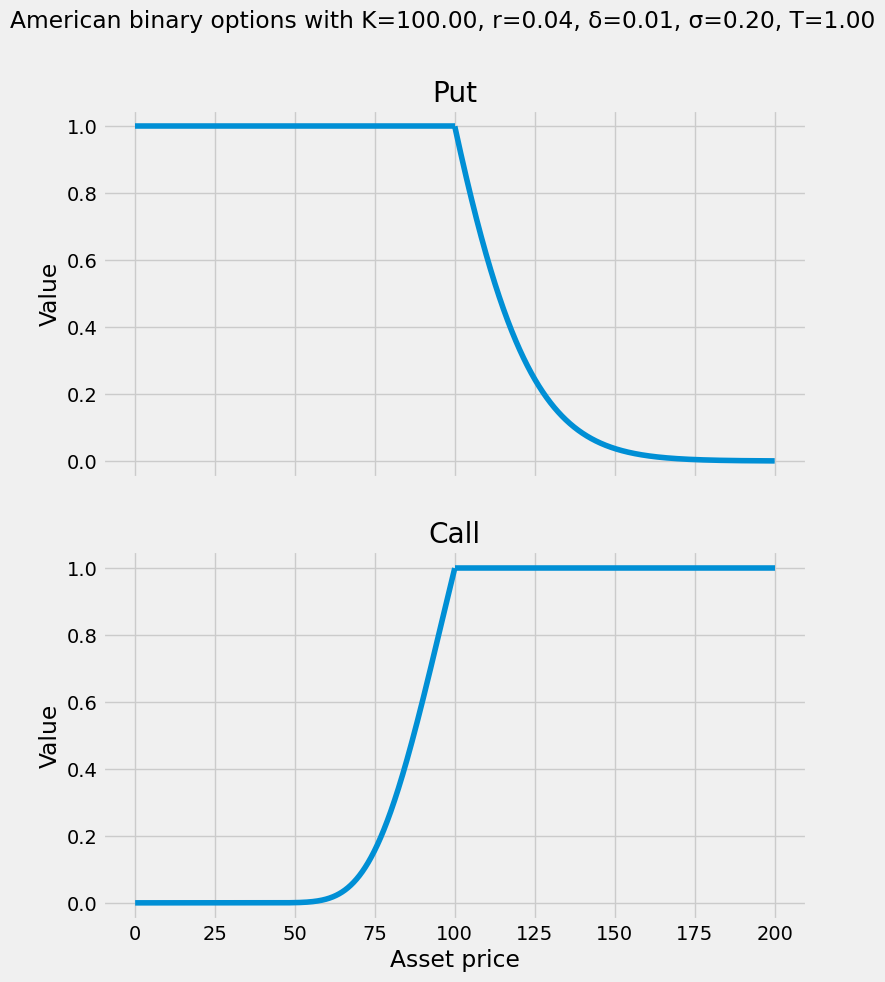

In [18]:
import matplotlib.pyplot as plt
import matplotlib

K = 100.
r = 0.04
δ = 0.01
σ = 0.2
T = 1.

matplotlib.style.use('fivethirtyeight')

x = np.linspace(K, 2. * K, 1001)
y = american_binary(x, δ, T, r, K, σ)

fig, (ax1, ax2) = plt.subplots(figsize=(1.618*5., 2.*5.), nrows=2, ncols=1, sharex=True, sharey=True)
ax1.hlines(1., 0., K)
ax1.plot(x, y)
ax1.set_ylabel("Value")
ax1.set_title("Put")

x = np.linspace(0, K, 1001)[1:]
y = american_binary(x, δ, T, r, K, σ)
y_wrong = american_binary(K, δ, T, r, x, σ)

ax2.hlines(1., K, 2.* K)
ax2.plot(x, y)
ax2.set_title("Call")
ax2.set_ylabel("Value")
ax2.set_xlabel("Asset price")

fig.suptitle(f"American binary options with K={K:.2f}, r={r:.2f}, δ={δ:.2f}, σ={σ:.2f}, T={T:.2f}");

## Appendix

In this appendix, we validate the identity both symbolically (via SageMath) and numerically (via numerical PDE methods).

### Symbolic validation

Below, we use [SageMath](https://www.sagemath.org/) to verify that $F^\prime(t) = e^{-rt} f(t)$.

In [ ]:
var("t a r μ")
assume(t > 0)
assume(a, "real")
assume(r, "real")
assume(μ, "real")
b = sqrt(μ^2 + 2 * r)
F = 1/2 * exp(a * (μ - b)) * (
    1 + sign(a) * erf((b * t - a) / sqrt(2 * t)) + exp(2 * a * b) * (
        1 - sign(a) * erf((b * t + a) / sqrt(2 * t))))
f = sign(a) * a / sqrt(2 * pi * t^3) * exp(- (a - μ * t)^2 / (2 * t))
delta = diff(F, t) - exp(-r * t) * f
assert delta.canonicalize_radical() == 0

### Numerical PDE validation

Let $V(t, S_t)$ be the value of the American binary put at time $t$ with asset price $S_t \geq K$.
By standard dynamic programming arguments, the function $V: [0, T] \times \Omega \rightarrow \mathbb{R}$ where $\Omega = (K, \infty)$ is a solution of the following [boundary value problem](https://en.wikipedia.org/wiki/Boundary_value_problem) (BVP):

$$
\begin{align*}
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2}V}{\partial S^{2}}+\left(r-\delta\right)S\frac{\partial V}{\partial S}-rV & =0 & \text{on }[0,T)\times\Omega\\
V & =1 & \text{on }[0,T]\times\{K\}\\
V & =0 & \text{ on }\{T\}\times\Omega.
\end{align*}
$$

The value of the American binary call with asset price $S_t \leq K$ satisfies the same BVP but with the domain replaced by $\Omega = [0, K)$.

Below, a [finite difference](https://en.wikipedia.org/wiki/Finite_difference_method) solver for the BVP is given.
The solver quantizes time and space.
At each point in quantized time, it solves a tridiagonal linear system using the [Thomas algorithm](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm).

In [73]:
from numba import njit
from numpy.typing import NDArray

@njit
def solve_tridiag(a: NDArray, b: NDArray, c: NDArray, d: NDArray) -> NDArray:
    """Solves a tridiagonal linear system using the Thomas algorithm.

    Parameters
    ----------
    a: ndarray of shape (n - 1,)
        Subdiagonal
    b: ndarray of shape (n,)
        Diagonal
    c: ndarray of shape (n - 1,)
        Superdiagonal
    d: ndarray of shape (n,)
        Right hand side

    Returns
    -------
    x: ndarray of shape (n,)
        Solution
    """
    n = d.size

    c_new = np.empty_like(a)
    d_new = np.empty_like(d)
    
    c_new[0] = c[0] / b[0]
    d_new[0] = d[0] / b[0]
    
    for i in range(1, n - 1):
        denom = b[i] - a[i - 1] * c_new[i - 1]
        c_new[i] = c[i] / denom
        d_new[i] = (d[i] - a[i - 1] * d_new[i - 1]) / denom
    
    d_new[n - 1] = (d[n - 1] - a[n - 2] * d_new[n - 2]) / (b[n - 1] - a[n - 2] * c_new[n - 2])

    x = np.empty_like(d)
    x[n - 1] = d_new[n - 1]
    
    for i in range(n-2, -1, -1):
        x[i] = d_new[i] - c_new[i] * x[i+1]
    
    return x

def american_binary_pde(
    dividend_rate: float,
    expiry_time: float,
    risk_free_rate: float,
    strike: float,
    volatility: float,
    put: bool = True,
    num_points: int = 10_000,
    num_steps: int = 10_000,
) -> tuple[NDArray, NDArray]:
    """Computes the value of an American binary option via a numerical PDE method.

    Parameters
    ----------
    put
        Whether to compute the value of an American binary put or call
    num_points
        Number of asset price grid points
    num_steps
        Number of time steps to take

    Returns
    -------
    S
        Grid of asset prices
    V
        Value of option on the grid at the initial time
    """
    δ, T, r, K, σ = dividend_rate, expiry_time, risk_free_rate, strike, volatility
    
    # When solving the call option, use a grid on [0, K]
    # When solving the put, use a grid on [K, H] where H is chosen large enough
    H = np.exp(np.log(K) - (r - δ - 0.5 * σ**2) * T + 7.0 * σ * T**0.5)
    S = np.linspace(K if put else 0., H if put else K, num_points + 1)
    
    # Since the coefficients of the PDE are constant in time, the matrix
    # in the linear system solved at each timestep is also constant
    Δt = T / num_steps
    Sn = np.concatenate(((np.nan,), S[:-1]))
    Sp = np.concatenate((S[1:], (np.nan,)))
    ΔSn = S - Sn
    ΔSp = Sp - S
    wn = +2.0 / (ΔSn * (ΔSn + ΔSp))
    w  = -2.0 / (ΔSn * ΔSp)
    wp = +2.0 / (ΔSp * (ΔSn + ΔSp))
    a =              - 0.5 * σ**2 * S**2 * Δt * wn
    b = 1.0 + r * Δt - 0.5 * σ**2 * S**2 * Δt * w
    c =              - 0.5 * σ**2 * S**2 * Δt * wp
    a = a[+1:]
    c = c[:-1]
    a[-1] = c[0] = 0.
    b[0] = b[-1] = 1.
    
    # Solution vector
    V = np.zeros((num_points + 1,))
    V[0 if put else -1] = 1.0  # Exercise boundary
    
    # Average value of the asset after one timestep
    S_next = (1.0 + (r - δ) * Δt) * S
    
    for n in range(num_steps - 1, -1, -1):
        V_next = np.interp(S_next, S, V)
        V_next[-1 if put else +0] = 0.0
        V_next[+0 if put else -1] = 1.0  # Exercise boundary
        V = solve_tridiag(a, b, c, V_next)

    return S, V

In [ ]:
def test_solve_tridiag() -> None:
    n = 5
    np.random.seed(42)
    
    a = np.random.rand(n - 1)
    b = np.random.rand(n)
    c = np.random.rand(n - 1)
    d = np.random.rand(n)

    A = np.zeros((n, n))
    np.fill_diagonal(A, b)
    np.fill_diagonal(A[1:], a)
    np.fill_diagonal(A[:, 1:], c)

    assert np.allclose(solve_tridiag(a, b, c, d), np.linalg.solve(A, d))

test_solve_tridiag()

In [74]:
import pandas as pd

K = 100.
r = 0.04
δ = 0.01
σ = 0.2
T = 1.0

N = 100*2**np.arange(9)

put = True

rows = []
for n in N:
    for put in (False, True):
        args = (δ, T, r, K, σ)
        S, V_pde = american_binary_pde(*args, put=put, num_points=n, num_steps=n)
        V = american_binary(S, *args)
        ε = V - V_pde
        row = {
            "K": K,
            "r": r,
            "δ": δ,
            "σ": σ,
            "T": T,
            "put": put,
            "num_points": n,
            "num_steps": n,
            "L2 error": (np.linalg.norm(ε, ord=2) / S.size).item(),
            "L∞ error": np.linalg.norm(ε, ord=np.inf).item()
        }
        rows.append(row)
pd.DataFrame(rows)

K     r     δ    σ    T    put  num_points  num_steps      L2 error  \
0   100.0  0.04  0.01  0.2  1.0  False         100        100  3.868804e-05   
1   100.0  0.04  0.01  0.2  1.0   True         100        100  1.611105e-04   
2   100.0  0.04  0.01  0.2  1.0  False         200        200  1.326254e-05   
3   100.0  0.04  0.01  0.2  1.0   True         200        200  5.489578e-05   
4   100.0  0.04  0.01  0.2  1.0  False         400        400  4.614911e-06   
5   100.0  0.04  0.01  0.2  1.0   True         400        400  1.904722e-05   
6   100.0  0.04  0.01  0.2  1.0  False         800        800  1.618464e-06   
7   100.0  0.04  0.01  0.2  1.0   True         800        800  6.670684e-06   
8   100.0  0.04  0.01  0.2  1.0  False        1600       1600  5.698837e-07   
9   100.0  0.04  0.01  0.2  1.0   True        1600       1600  2.347245e-06   
10  100.0  0.04  0.01  0.2  1.0  False        3200       3200  2.010720e-07   
11  100.0  0.04  0.01  0.2  1.0   True        3200       3200  8.279000e-07   
12  100.0  0.04  0.01  0.2  1.0  False        6400       6400  7.101676e-08   
13  100.0  0.04  0.01  0.2  1.0   True        6400       6400  2.923577e-07   
14  100.0  0.04  0.01  0.2  1.0  False       12800      12800  2.509538e-08   
15  100.0  0.04  0.01  0.2  1.0   True       12800      12800  1.033023e-07   
16  100.0  0.04  0.01  0.2  1.0  False       25600      25600  8.870363e-09   
17  100.0  0.04  0.01  0.2  1.0   True       25600      25600  3.651204e-08   

    L∞ error  
0   0.000985  
1   0.004720  
2   0.000476  
3   0.002290  
4   0.000234  
5   0.001129  
6   0.000116  
7   0.000560  
8   0.000058  
9   0.000279  
10  0.000029  
11  0.000139  
12  0.000014  
13  0.000070  
14  0.000007  
15  0.000035  
16  0.000004  
17  0.000017